<a href="https://colab.research.google.com/github/Andbwol/Sber_lesson2/blob/main/%D0%A2%D0%BE%D0%BF_100_%D1%84%D1%83%D1%82%D0%B1%D0%BE%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D0%BA%D0%BB%D1%83%D0%B1%D0%BE%D0%B2_%D0%B5%D0%B2%D1%80%D0%BE%D0%BF%D1%8B_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("club.csv")

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      100 non-null    int64  
 1   Club Name                                       100 non-null    object 
 2   Competition Name                                100 non-null    object 
 3   Squad Size                                      100 non-null    int64  
 4   Average Age Of Players                          100 non-null    float64
 5   Market Value Of Club In Millions(£)             100 non-null    float64
 6   Average Market Value Of Players In Millions(£)  100 non-null    float64
 7   Market Value Of Top 18 Players In Millions(£)   100 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [25]:
data.head()

,Unnamed: 0,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
0,0,Manchester City,Premier League,24,27.1,970.02,40.42,920.70
1,1,Paris Saint-Germain,Ligue 1,36,26.1,891.18,24.76,801.00
2,2,Manchester United,Premier League,29,27.9,820.13,28.28,742.50
3,3,Chelsea FC,Premier League,27,26.9,802.35,29.72,737.10
4,4,Liverpool FC,Premier League,27,27.2,779.85,28.88,715.95


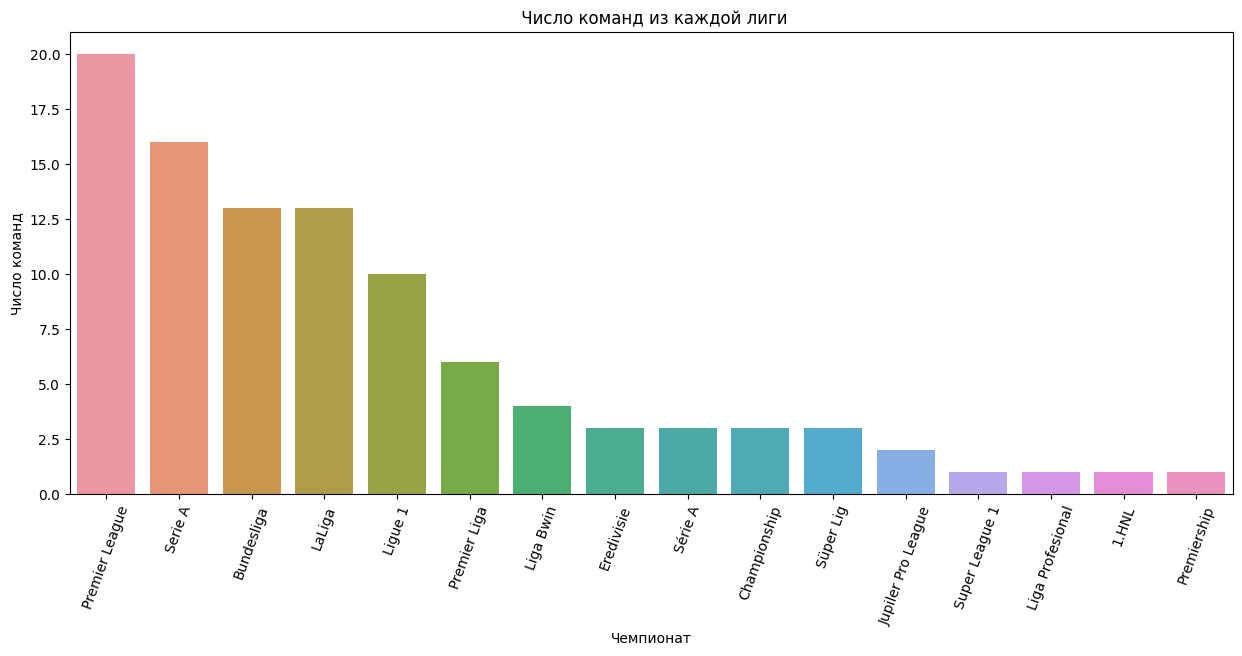

In [35]:
df1 = data['Competition Name'].value_counts().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x="index", y="Competition Name", data=df1)
plt.title(" Число команд из каждой лиги")
plt.xlabel("Чемпионат")
plt.ylabel("Число команд")
plt.xticks(rotation=70)
plt.show()

Больше всего богатых команд в Англии, Италии, Германии и Испании

Посчитаем общую стоимость команд по лигам

In [85]:
df2 = data.groupby('Competition Name')['Market Value Of Club In Millions(£)'].agg(['sum']).reset_index()

In [90]:
df2 = df2.sort_values(by='sum', ascending=False)

In [115]:
df2

,Competition Name,sum
9,Premier League,8171.22
12,Serie A,4193.43
5,LaLiga,4027.41
1,Bundesliga,3581.39
8,Ligue 1,2646.33
6,Liga Bwin,777.79
10,Premier Liga,743.74
3,Eredivisie,543.92
14,Série A,351.23
2,Championship,349.39


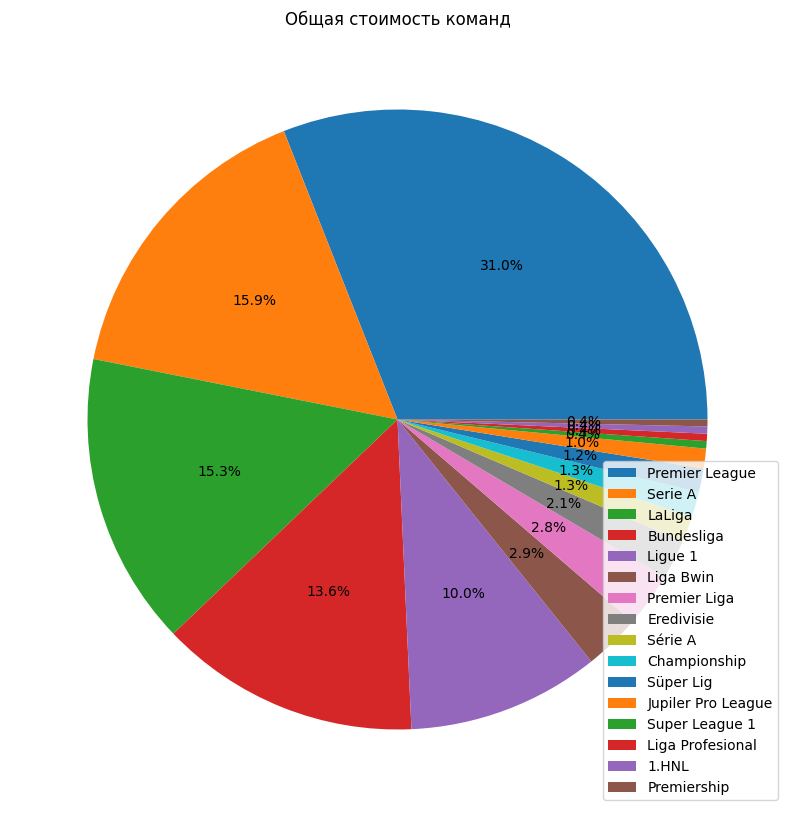

In [114]:
plt.figure(figsize=(10,15))
plt.pie(df2["sum"], autopct="%1.1f%%")
plt.title("Общая стоимость команд")
plt.legend(df2["Competition Name"], loc='lower right')
plt.show()

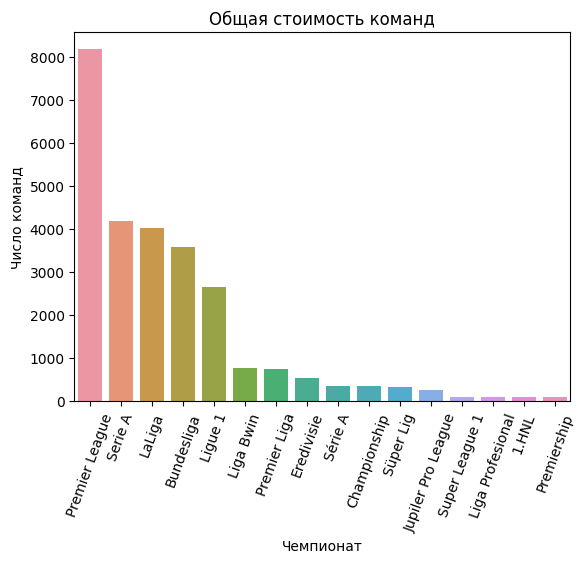

In [98]:
sns.barplot(x = 'Competition Name', y="sum", data=df2)
plt.title("Общая стоимость команд")
plt.xlabel("Чемпионат")
plt.ylabel("Число команд")
plt.xticks(rotation=70)
plt.show()

На первом месте опять Англия, на втором уже Италия, Испания третья

Но у нас в выборку попало разное число команд из разных лиг

Для более корректного сравнения посчитаем среднюю стоимость команд в лигах

In [58]:
df2 = data.groupby('Competition Name')['Market Value Of Club In Millions(£)'].agg(['sum','count']).reset_index()

In [59]:
df2['Avg team value'] = df2['sum']/df2['count']

In [70]:
df2 = df2.sort_values(by='Avg team value', ascending=False)

In [75]:
df2

,Competition Name,sum,count,Avg team value
9,Premier League,8171.22,20,408.561000
5,LaLiga,4027.41,13,309.800769
1,Bundesliga,3581.39,13,275.491538
8,Ligue 1,2646.33,10,264.633000
12,Serie A,4193.43,16,262.089375
6,Liga Bwin,777.79,4,194.447500
3,Eredivisie,543.92,3,181.306667
4,Jupiler Pro League,270.95,2,135.475000
10,Premier Liga,743.74,6,123.956667
14,Série A,351.23,3,117.076667


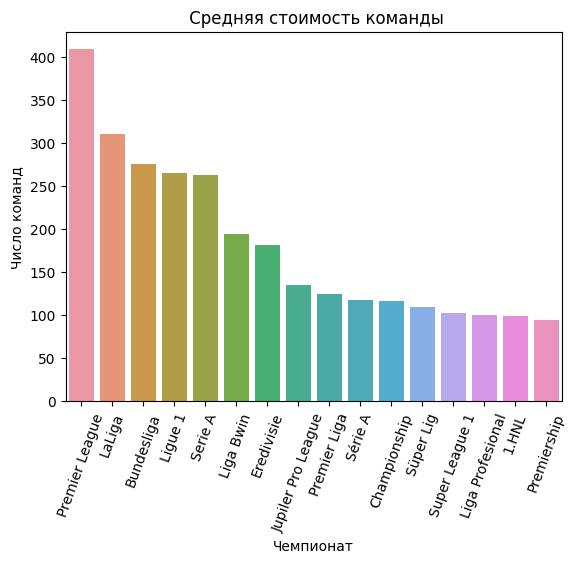

In [74]:
sns.barplot(x = 'Competition Name', y="Avg team value", data=df2)
plt.title(" Средняя стоимость команды")
plt.xlabel("Чемпионат")
plt.ylabel("Число команд")
plt.xticks(rotation=70)
plt.show()

При этом по средней стоимости  1 команды Англия сохраняет 1-е место.

Испания выходит на 2е место, обходя Италию и Германию

А Франция выходит на 4е место, обгоняя Италию.

Но в этих странах представлено разное число команд

Для более корректного сравнения возьмем 10 самых богатых команд в Топ-5 лигах и найдем общюю сумму и среднюю (10 это минимальное число команд в странах из Топ-5 - во Франции)

In [140]:
df2.head(5)['Competition Name'].reset_index(drop=True)

0    Premier League
1           Serie A
2            LaLiga
3        Bundesliga
4           Ligue 1
Name: Competition Name, dtype: object

In [167]:
r = df2.head(5)['Competition Name'].reset_index(drop=True)

In [172]:
r[4]

'Ligue 1'

In [126]:
df3 = data.sort_values(by = 'Market Value Of Club In Millions(£)', ascending=False)

In [166]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      100 non-null    int64  
 1   Club Name                                       100 non-null    object 
 2   Competition Name                                100 non-null    object 
 3   Squad Size                                      100 non-null    int64  
 4   Average Age Of Players                          100 non-null    float64
 5   Market Value Of Club In Millions(£)             100 non-null    float64
 6   Average Market Value Of Players In Millions(£)  100 non-null    float64
 7   Market Value Of Top 18 Players In Millions(£)   100 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 7.0+ KB


In [130]:
df4 = df3.loc[df3['Competition Name'] == 'Premier League'].head(10)

In [144]:
df4 = df3.loc[df3['Competition Name'] == r[0]].head(10)

In [145]:
df4

,Unnamed: 0,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
0,0,Manchester City,Premier League,24,27.1,970.02,40.42,920.70
2,2,Manchester United,Premier League,29,27.9,820.13,28.28,742.50
3,3,Chelsea FC,Premier League,27,26.9,802.35,29.72,737.10
4,4,Liverpool FC,Premier League,27,27.2,779.85,28.88,715.95
8,8,Tottenham Hotspur,Premier League,24,25.6,627.30,26.14,558.00
12,12,Arsenal FC,Premier League,26,25.4,507.15,19.51,453.60
13,13,Leicester City,Premier League,28,27.1,493.29,17.62,447.30
19,19,Everton FC,Premier League,26,28.0,385.88,14.84,360.90
22,22,Aston Villa,Premier League,25,25.6,371.79,14.87,354.42
24,24,Wolverhampton Wanderers,Premier League,24,26.4,345.69,14.40,332.37


In [160]:
df6 = pd.DataFrame()

In [161]:
df6

""


In [196]:
df6 = df3.loc[df3['Competition Name'] == r[0]].head(10)
for i in range(1, 5):
    df5 = df3.loc[df3['Competition Name'] == r[i]].head(10)
    df6 = pd.concat([df6, df5])

In [204]:
df7 = df6.groupby('Competition Name')['Market Value Of Club In Millions(£)'].agg(['sum']).reset_index()

In [205]:
df7 = df7.sort_values(by = 'sum', ascending=False)

In [206]:
df7

,Competition Name,sum
3,Premier League,6103.45
1,LaLiga,3718.80
4,Serie A,3543.24
0,Bundesliga,3256.44
2,Ligue 1,2646.33


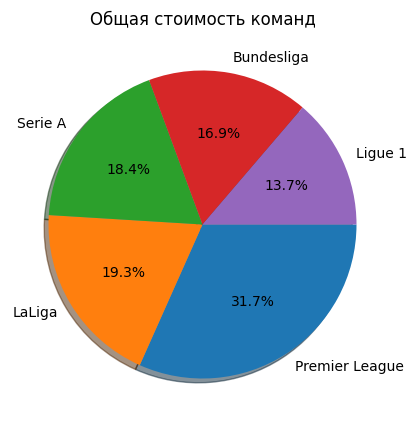

In [212]:
plt.figure(figsize=(10,5))
plt.pie(df7["sum"], autopct="%1.1f%%", labels = df7["Competition Name"], counterclock=False, shadow=True)
plt.title("Общая стоимость команд")
plt.show()

Из Топ5 лиг Англия занимает 1е место с долей 31,7 %

При этом Италия с пятого места перемещается на 3-е.

In [213]:
df6 = df3.loc[df3['Competition Name'] == r[0]].head(5)
for i in range(1, 5):
    df5 = df3.loc[df3['Competition Name'] == r[i]].head(5)
    df6 = pd.concat([df6, df5])

In [214]:
df7 = df6.groupby('Competition Name')['Market Value Of Club In Millions(£)'].agg(['sum']).reset_index()

In [215]:
df7 = df7.sort_values(by = 'sum', ascending=False)

In [217]:
df7

,Competition Name,sum
3,Premier League,3999.65
1,LaLiga,2663.82
0,Bundesliga,2353.89
4,Serie A,2298.29
2,Ligue 1,1992.02
